In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Prepare data timestamps
import time
import datetime
one_yr = 31536000000
one_mon = one_yr/12
one_day = one_yr/365
one_hr = one_day/24
one_min = one_hr/60
one_sec = one_min/60

In [6]:
# Prepare how far to look back in the past in UNIX time-format
history_split = historical_start.replace('yr', '')
history_res = history_split.replace('mon', '')
history_split = history_res.replace('day', '')
history_res = history_split.replace('hr', '')
history_split = history_res.replace('min', '')
history_res = history_split.replace('sec', '')
history_split = history_res.split(",")
print(history_split)

['6', '0', '0', '0', '0', '0']


In [7]:
# Prepare how far to predict into the future in UNIX time-format
predict_split = predict_into.replace('yr', '')
predict_res = predict_split.replace('mon', '')
predict_split = predict_res.replace('day', '')
predict_res = predict_split.replace('hr', '')
predict_split = predict_res.replace('min', '')
predict_res = predict_split.replace('sec', '')
predict_split = predict_res.split(",")
print(predict_split)

['0', '0', '10', '0', '0', '0']


In [8]:
history_array_yr = int(history_split[0])
unix_hist_yr = one_yr*history_array_yr

history_array_mon = int(history_split[1])
unix_hist_mon = one_mon*history_array_mon

history_array_day = int(history_split[2])
unix_hist_day = one_day*history_array_day

history_array_hr = int(history_split[3])
unix_hist_hr = one_hr*history_array_hr

history_array_min = int(history_split[4])
unix_hist_min = one_min*history_array_min

history_array_sec = int(history_split[5])
unix_hist_sec = one_sec*history_array_sec

In [9]:
predict_array_yr = int(predict_split[0])
unix_pred_yr = one_yr*predict_array_yr

predict_array_mon = int(predict_split[1])
unix_pred_mon = one_mon*predict_array_mon

predict_array_day = int(predict_split[2])
unix_pred_day = one_day*predict_array_day

predict_array_hr = int(predict_split[3])
unix_pred_hr = one_hr*predict_array_hr

predict_array_min = int(predict_split[4])
unix_pred_min = one_min*predict_array_min

predict_array_sec = int(predict_split[5])
unix_pred_sec = one_sec*predict_array_sec

unix_prediction = unix_pred_yr+unix_pred_mon+unix_pred_day+unix_pred_hr+unix_pred_min+unix_pred_sec

In [10]:
raw_time = time.time()
int_time = int(raw_time)
current_time = str(int_time)

unix_start = unix_hist_yr+unix_hist_mon+unix_hist_day+unix_hist_hr+unix_hist_min+unix_hist_sec
raw_start = raw_time - unix_start

int_start = int(raw_start)
start = str(int_start)

#print(unix_hist_yr+history_array_mon+history_array_day+history_array_hr+history_array_min+history_array_sec)
print(start + ' - start')

gather_count = int_start/(7*one_day)
gather_int = int(gather_count)
gather_str = str(gather_int)
pos_gather_count = abs(int(gather_count))
pos_gather_str = str(pos_gather_count)

print(gather_str + ' - gather')
print(pos_gather_str + ' - positive gather')

-187603833850 - start
-310 - gather
310 - positive gather


In [11]:
c_dt = datetime.datetime.now()

print(int(c_dt.strftime("%s")))

c_dt_array_year = history_array_yr*365

history_array_comb = history_array_day + c_dt_array_year

#c_dt_start = int_time

c_dt_start = datetime.datetime.now() - datetime.timedelta(days=history_array_comb,hours=history_array_hr,minutes=history_array_min,seconds=history_array_sec)

#c_dt_str = str(c_dt_start)

#print(c_dt_str)

data_count = 0

c_dt_end = c_dt_start + datetime.timedelta(days=7) 
c_dt_raw_end = c_dt_end.strftime("%s")
c_dt_raw = c_dt_start.strftime("%s")
c_dt_int = int(c_dt_raw)
c_dt_end_int = int(c_dt_raw_end)
c_dt_end_str = str(c_dt_raw_end)
c_dt_str = str(c_dt_raw)
print(c_dt_int)
print(c_dt_end_int)

1612166149
1422950149
1423554949


In [12]:
import urllib.request

#while count < pos_gather_count:
while data_count < 1:
    
    d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1612158064&interval=1d&events=history&includeAdjustedClose=true"
    
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+dt_str+"&period2="+dt_end_str+"&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+gather_str+"&period2="+current_time+"&interval=1m&events=history&includeAdjustedClose=true"
    
    with urllib.request.urlopen(d_u) as testfile, open('dataset.csv', 'w') as f:
        f.write(testfile.read().decode())

    data_count += 1  # This is the same as count = count + 1

In [21]:
data=pd.read_csv('dataset.csv')

data.apply(pd.to_numeric, errors='coerce')
#data=data.dropna()
#data=data.dropna(inplace=True)
#data=data.dropna(subset=['Close'])
#data=data.dropna(how='any',axis=1)
data.dropna(subset=['Close'], inplace=True)
data.reset_index(drop=True)

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,2.361330e+07
1,2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,3.249770e+07
2,2014-09-30,376.088013,390.976990,373.442993,386.944000,386.944000,3.470730e+07
3,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,2.622940e+07
4,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,2.177770e+07
...,...,...,...,...,...,...,...
2314,2021-01-28,30441.041016,31891.300781,30023.207031,31649.605469,31649.605469,7.894816e+10
2315,2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,34316.386719,1.178946e+11
2316,2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,34269.523438,6.514183e+10
2317,2021-01-31,34270.878906,34288.332031,32270.175781,33114.359375,33114.359375,5.275454e+10


In [22]:
df1=data['Close']
df1

0         377.181000
1         375.467010
2         386.944000
3         383.614990
4         375.071991
            ...     
2314    31649.605469
2315    34316.386719
2316    34269.523438
2317    33114.359375
2318    33738.781250
Name: Close, Length: 2315, dtype: float64

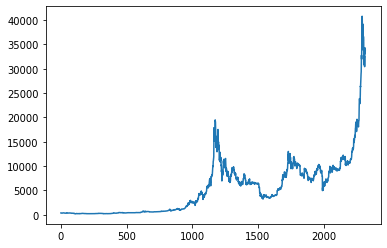

In [23]:
plt.plot(df1)

In [24]:
import numpy as np

In [25]:
df1

0         377.181000
1         375.467010
2         386.944000
3         383.614990
4         375.071991
            ...     
2314    31649.605469
2315    34316.386719
2316    34269.523438
2317    33114.359375
2318    33738.781250
Name: Close, Length: 2315, dtype: float64

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(1504, 811)

In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)

(1403, 100)
(1403,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(710, 100)
(710,)


(None, None)

In [33]:
X_train.shape[1]

100

In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam

In [36]:
opt = Adam(lr=0.0001)
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(optimizer=opt, loss='mean_squared_error')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)

Epoch 1/100
11/11 [==============================] - 18s 1s/step - loss: 0.0146 - val_loss: 0.0787
Epoch 2/100
11/11 [==============================] - 12s 1s/step - loss: 0.0095 - val_loss: 0.0569
Epoch 3/100
11/11 [==============================] - 12s 1s/step - loss: 0.0074 - val_loss: 0.0358
Epoch 4/100
11/11 [==============================] - 12s 1s/step - loss: 0.0048 - val_loss: 0.0210
Epoch 5/100
11/11 [==============================] - 12s 1s/step - loss: 0.0036 - val_loss: 0.0129
Epoch 6/100
11/11 [==============================] - 12s 1s/step - loss: 0.0024 - val_loss: 0.0074
Epoch 7/100
11/11 [==============================] - 12s 1s/step - loss: 0.0013 - val_loss: 0.0033
Epoch 8/100
11/11 [==============================] - 12s 1s/step - loss: 9.5356e-04 - val_loss: 0.0027
Epoch 9/100
11/11 [==============================] - 12s 1s/step - loss: 8.7482e-04 - val_loss: 0.0030
Epoch 10/100
11/11 [==============================] - 12s 1s/step - loss: 8.3976e-04 - val_loss: 0.00

11/11 [==============================] - 12s 1s/step - loss: 2.9855e-04 - val_loss: 0.0036
Epoch 80/100
11/11 [==============================] - 12s 1s/step - loss: 3.0880e-04 - val_loss: 0.0039
Epoch 81/100
11/11 [==============================] - 12s 1s/step - loss: 2.8348e-04 - val_loss: 0.0037
Epoch 82/100
11/11 [==============================] - 12s 1s/step - loss: 3.1720e-04 - val_loss: 0.0040
Epoch 83/100
11/11 [==============================] - 12s 1s/step - loss: 2.8768e-04 - val_loss: 0.0037
Epoch 84/100
11/11 [==============================] - 12s 1s/step - loss: 2.9736e-04 - val_loss: 0.0035
Epoch 85/100
11/11 [==============================] - 12s 1s/step - loss: 3.3329e-04 - val_loss: 0.0036
Epoch 86/100
11/11 [==============================] - 12s 1s/step - loss: 2.9753e-04 - val_loss: 0.0039
Epoch 87/100
11/11 [==============================] - 12s 1s/step - loss: 3.9922e-04 - val_loss: 0.0040
Epoch 88/100
11/11 [==============================] - 12s 1s/step - loss: 2.7

In [39]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4811.927133570552

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10864.702187219149

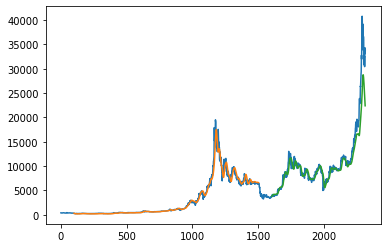

In [42]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

811

In [44]:
x_input=test_data[707:].reshape(1,-1)
x_input.shape

(1, 104)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.3113180731031483,
 0.31481890710336197,
 0.3139731917792928,
 0.3183189717441524,
 0.3164260715379194,
 0.31751112211903304,
 0.3317646361231712,
 0.3223373035889826,
 0.3264387236173223,
 0.32911329201283684,
 0.33488570721202776,
 0.33380529669222464,
 0.32921094945266594,
 0.339053794889521,
 0.3435690208573908,
 0.3791711669923632,
 0.3788272983625966,
 0.36080327448138744,
 0.3767023716045809,
 0.3730772179252208,
 0.37205768101567255,
 0.3821621243385559,
 0.39631798090286485,
 0.3973387920277991,
 0.39119223968724126,
 0.38842138422797945,
 0.40714449302016087,
 0.4300225386899457,
 0.4339270570640513,
 0.4342491679454155,
 0.45404814338140403,
 0.45456311687235057,
 0.44786115288325967,
 0.44771637369896156,
 0.46601654069465415,
 0.45677606035727386,
 0.4178416126492497,
 0.41680219324796247,
 0.431795278425626,
 0.4431216177395173,
 0.47877817027173725,
 0.4585209597743281,
 0.4683215158494165,
 0.4743360311102991,
 0.4559795103278643,
 0.4671678502296545,
 0.4718673318832

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.31481891 0.31397319 0.31831897 0.31642607 0.31751112 0.33176464
 0.3223373  0.32643872 0.32911329 0.33488571 0.3338053  0.32921095
 0.33905379 0.34356902 0.37917117 0.3788273  0.36080327 0.37670237
 0.37307722 0.37205768 0.38216212 0.39631798 0.39733879 0.39119224
 0.38842138 0.40714449 0.43002254 0.43392706 0.43424917 0.45404814
 0.45456312 0.44786115 0.44771637 0.46601654 0.45677606 0.41784161
 0.41680219 0.43179528 0.44312162 0.47877817 0.45852096 0.46832152
 0.47433603 0.45597951 0.46716785 0.47186733 0.4680886  0.44665835
 0.45238888 0.44527595 0.44020233 0.45853716 0.46687618 0.46944297
 0.47363877 0.52025484 0.55704909 0.56524217 0.5832599  0.57359614
 0.55699788 0.58112292 0.56778737 0.57996387 0.60283076 0.64646118
 0.64240544 0.66240848 0.66924335 0.7056425  0.70960039 0.71876918
 0.78654734 0.80266658 0.78272273 0.83246523 0.90218379 0.96487977
 1.         0.9866305  0.93990158 0.87122066 0.830755   0.9142961
 0.96035695 0.90220851 0.88627462 0.87675054 0.8974

ValueError: cannot reshape array of size 103 into shape (1,100,1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2205:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2206:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)